In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('C:\\Users\\Master\\Desktop\\dataTools')
import dataTools as dt

In [2]:
raw_train = pd.read_csv('C:\\Users\\Master\\Desktop\\snb edu_codes\\4. Overfit\\california_housing_train.csv')
raw_test = pd.read_csv('C:\\Users\\Master\\Desktop\\snb edu_codes\\4. Overfit\\california_housing_test.csv')

In [3]:
raw_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [5]:
raw_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [4]:
features = raw_train.drop(columns='median_house_value')
target = raw_train['median_house_value']

In [14]:
from sklearn.linear_model import LinearRegression
base_model = LinearRegression().fit(features, target)
base_model.score(features, target)

0.6413378529502691

In [15]:
def rSquare( x, y, yhat ):
    if x.ndim == 1: p, n = 1, x.shape[0]
    else: p, n = x.shape[1], x.shape[0]
    r2 = 1 - np.sum( (y - yhat) ** 2) / np.sum( (y - np.mean(y)) ** 2 ) 
    adj_r2 = 1 - (1 - r2) * ( n - 1) / ( n - p - 1 )
    return {'r2': r2, 'adjr2': adj_r2}

In [17]:
yhat = base_model.predict(features)
rSquare(features, target, yhat)

{'r2': 0.6413378529502691, 'adjr2': 0.641168981360816}

0         66900.0
1         80100.0
2         85700.0
3         73400.0
4         65500.0
           ...   
16995    111400.0
16996     79000.0
16997    103600.0
16998     85800.0
16999     94600.0
Name: median_house_value, Length: 17000, dtype: float64

In [9]:
features.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000


In [11]:
features.corr().style.background_gradient().set_precision(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
longitude,1.000,-0.925,-0.114,0.047,0.072,0.102,0.060,-0.015
latitude,-0.925,1.000,0.016,-0.039,-0.069,-0.111,-0.075,-0.080
housing_median_age,-0.114,0.016,1.000,-0.361,-0.320,-0.296,-0.303,-0.116
total_rooms,0.047,-0.039,-0.361,1.000,0.928,0.860,0.919,0.195
total_bedrooms,0.072,-0.069,-0.320,0.928,1.000,0.881,0.981,-0.013
population,0.102,-0.111,-0.296,0.860,0.881,1.000,0.909,-0.001
households,0.060,-0.075,-0.303,0.919,0.981,0.909,1.000,0.008
median_income,-0.015,-0.080,-0.116,0.195,-0.013,-0.001,0.008,1.000


In [12]:
def visualCorr(x, width=15, height=7):
    plt.figure(figsize=(width,height))
    mask = np.zeros_like(x.corr(), dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(x.corr(), annot=True, fmt='.2f', mask=mask, cmap='seismic')
    plt.show()

<ipython-input-12-f2c3167f46c8>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(x.corr(), dtype=np.bool)


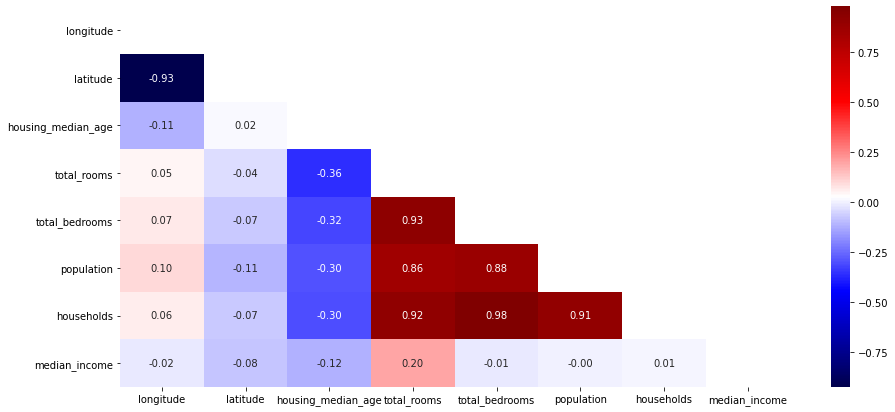

In [13]:
visualCorr(features)

In [18]:
features_corr = features.drop(columns=['latitude','total_rooms','total_bedrooms','population','population','households'])

<ipython-input-12-f2c3167f46c8>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(x.corr(), dtype=np.bool)


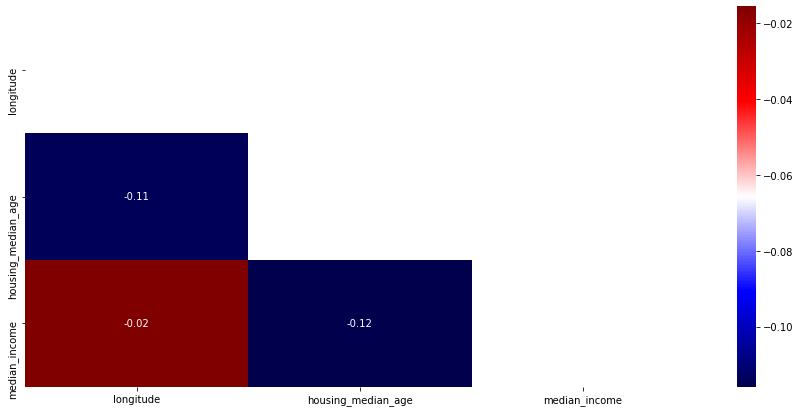

In [19]:
visualCorr(features_corr)

In [20]:
model_corr = LinearRegression().fit(features_corr, target)
yhat = model_corr.predict(features_corr)
rSquare(features_corr, target, yhat)

{'r2': 0.5142707802464033, 'adjr2': 0.5141850431518363}

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif(x):
    vifFrame = pd.DataFrame()
    vifFrame['vif factor'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1]) ]
    vifFrame['features'] = x.columns
    return vifFrame

In [22]:
vif(features)

,vif factor,features
0,615.268673,longitude
1,549.530177,latitude
2,7.271744,housing_median_age
3,30.044820,total_rooms
4,96.656002,total_bedrooms
5,16.638519,population
6,96.284435,households
7,8.253099,median_income


In [24]:
vif(features.drop(columns=['longitude','latitude','households','total_bedrooms','total_rooms']))

,vif factor,features
0,2.885765,housing_median_age
1,2.027615,population
2,3.344828,median_income


In [26]:
features_vif = features.drop(columns=['longitude','latitude','households','total_bedrooms','total_rooms'])

<ipython-input-12-f2c3167f46c8>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(x.corr(), dtype=np.bool)


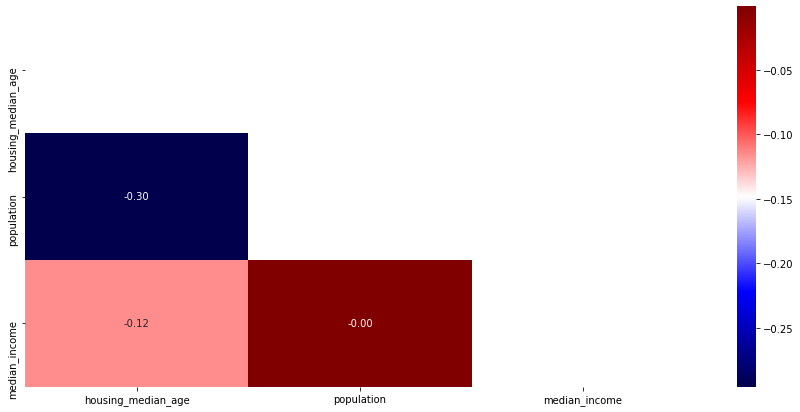

In [28]:
visualCorr(features_vif)

In [29]:
model_vif = LinearRegression().fit(features_vif, target)
yhat = model_vif.predict(features_vif)
rSquare(features_vif, target, yhat)

{'r2': 0.5150206852133975, 'adjr2': 0.5149350804861463}

In [45]:
def forward(model, x, y, col_selected):
    col_forw = [ cl for cl in features.columns if cl not in col_selected ]
    rst = []
    for col in col_forw:
        columns = col_selected + [col]
        model = model.fit(x[columns], y)
        yhat = model.predict(x[columns])
        score = rSquare(x[columns], y, yhat)
        rst.append( {'model': model, 'score': score['adjr2'], 'columns': columns} )
  
    models = pd.DataFrame(rst)
    model_best = models.loc[ models.score.argmax() ]
    return model_best

def forward_selection(x, y):
    col_selected = []
  
    for i in range(0, x.shape[1]):
        model = LinearRegression()
        model_best = forward(model, features, target, col_selected)
  
        if not i:
            model_prior = model_best
        else: 
            if model_best.score > model_prior.score: model_prior = model_best
            else: break
        col_selected = model_best.columns
    return model_prior

from itertools import combinations
def backward(model, x, y, col_selected):
    rst = []
    for com in combinations(col_selected, len(col_selected)-1):
        columns = list(com)
        model = model.fit(x[columns], y)
        yhat = model.predict(x[columns])
        score = rSquare(x[columns], y, yhat)
        rst.append( {'model': model, 'score': score['adjr2'], 'columns': columns} )
  
    models = pd.DataFrame(rst)
    model_best = models.loc[ models.score.argmax() ]
    return model_best

def backward_elimination(x, y):
    col_selected = x.columns
    for i in range(0, x.shape[1]):
        model = LinearRegression()
        model_best = backward(model, features, target, col_selected)
        if not i:
            model_prior = model_best
        else:
            if model_best.score > model_prior.score: model_prior = model_best
            else: break
        col_selected = model_best.columns
    return model_prior

In [46]:
forward_selection(features, target)

model                                     LinearRegression()
score                                               0.641169
columns    [median_income, housing_median_age, total_bedr...
Name: 0, dtype: object

In [50]:
forward_selection(features, target).columns

['median_income',
 'housing_median_age',
 'total_bedrooms',
 'population',
 'total_rooms',
 'latitude',
 'longitude',
 'households']

In [56]:
features_forward = features[forward_selection(features, target).columns]
model_forward = LinearRegression().fit(features_forward, target)
yhat = model_forward.predict(features_forward)
rSquare(features_forward, target, yhat)

{'r2': 0.6413378529502689, 'adjr2': 0.6411689813608158}

In [48]:
backward_elimination(features, target)

model                                     LinearRegression()
score                                               0.640579
columns    [longitude, latitude, housing_median_age, tota...
Name: 1, dtype: object

In [57]:
features_backward = features[backward_elimination(features, target).columns]
model_backward = LinearRegression().fit(features_backward, target)
yhat = model_backward.predict(features_backward)
rSquare(features_backward, target, yhat)

{'r2': 0.6407268394704915, 'adjr2': 0.6405788338134937}

In [58]:
def forward(model, x, y, col_selected):
    col_forw = [ cl for cl in features.columns if cl not in col_selected ]
    rst = []
    for col in col_forw:
        columns = col_selected + [col]
        model = model.fit(x[columns], y)
        yhat = model.predict(x[columns])
        score = rSquare(x[columns], y, yhat)
        rst.append( {'model': model, 'score': score['adjr2'], 'columns': columns} )
  
    models = pd.DataFrame(rst)
    model_best = models.loc[ models.score.argmax() ]
    return model_best

def backward(model, x, y, col_selected):
    rst = []
    for com in combinations(col_selected, len(col_selected)-1):
        columns = list(com)
        model = model.fit(x[columns], y)
        yhat = model.predict(x[columns])
        score = rSquare(x[columns], y, yhat)
        rst.append( {'model': model, 'score': score['adjr2'], 'columns': columns} )
  
    models = pd.DataFrame(rst)
    model_best = models.loc[ models.score.argmax() ]
    return model_best

def stepwise_selection(x, y):
    col_selected = []

    for i in range(x.shape[1]):
        model = LinearRegression()
        model_forw = forward(model, x, y, col_selected)
        col_selected = model_forw.columns

        if i < 1: model_prior = model_forw; continue

        model_back = backward(model, x, y, col_selected)
        model_high = model_forw
        if model_forw.score < model_back.score:
            col_selected = model_back.columns
            model_high = model_back
    
        if model_high.score > model_prior.score: model_prior = model_high
        else: break
    return model_prior

In [59]:
stepwise_selection(features, target)

model                                     LinearRegression()
score                                               0.641169
columns    [median_income, housing_median_age, total_bedr...
Name: 0, dtype: object

In [63]:
stepwise_selection(features, target).columns

['median_income',
 'housing_median_age',
 'total_bedrooms',
 'population',
 'total_rooms',
 'latitude',
 'longitude',
 'households']

In [64]:
features_stepwise = pd.DataFrame(features[stepwise_selection(features, target).columns])
model_stepwise = LinearRegression().fit(features_stepwise, target)
yhat = model_stepwise.predict(features_stepwise)
rSquare(features_stepwise, target, yhat)

{'r2': 0.6413378529502689, 'adjr2': 0.6411689813608158}

In [67]:
!pip install eli5
import eli5

You should consider upgrading via the 'c:\users\master\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [69]:
base_model = LinearRegression().fit(features, target)

In [75]:
eli5.show_weights(base_model)

Weight?,Feature
+40507.068,x7
+1150.695,x2
+117.649,x4
+45.436,x6
-8.378,x3
-38.489,x5
-42925.673,x1
-43139.637,x0
-3620600.893,<BIAS>


In [74]:
eli5.show_weights(base_model, feature_names = features.columns.tolist())

Weight?,Feature
+40507.068,median_income
+1150.695,housing_median_age
+117.649,total_bedrooms
+45.436,households
-8.378,total_rooms
-38.489,population
-42925.673,latitude
-43139.637,longitude
-3620600.893,<BIAS>


In [78]:
from eli5.sklearn import PermutationImportance
base_model = LinearRegression().fit(features, target)
perm = PermutationImportance(base_model).fit(features, target)
eli5.show_weights(perm, feature_names = features.columns.tolist())

Weight,Feature
1.2520 ± 0.0249,latitude
1.1066 ± 0.0311,longitude
0.8800 ± 0.0165,median_income
0.3629 ± 0.0062,total_bedrooms
0.2880 ± 0.0033,population
0.0493 ± 0.0033,total_rooms
0.0455 ± 0.0020,households
0.0318 ± 0.0018,housing_median_age


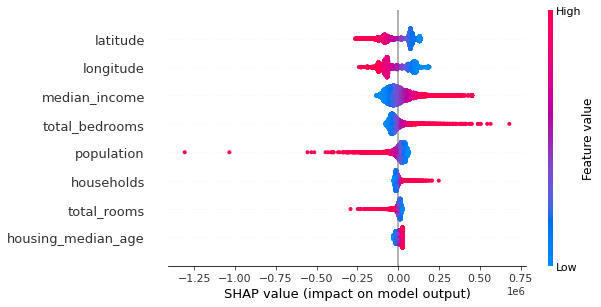

In [79]:
import shap
base_model = LinearRegression().fit(features, target)
explainer = shap.LinearExplainer(base_model, features)
shap_value = explainer.shap_values(features)
shap.summary_plot(shap_value, features)

In [80]:
target

0         66900.0
1         80100.0
2         85700.0
3         73400.0
4         65500.0
           ...   
16995    111400.0
16996     79000.0
16997    103600.0
16998     85800.0
16999     94600.0
Name: median_house_value, Length: 17000, dtype: float64

In [87]:
from sklearn.feature_selection import RFE
base_model = LinearRegression().fit(features, target)
feature_selector = RFE(base_model, n_features_to_select=3)
feature_selector = feature_selector.fit(features, target)

In [95]:
display(feature_selector.n_features_)
display(feature_selector.support_)

3

array([ True,  True, False, False, False, False, False,  True])

array([ True,  True, False, False, False, False, False,  True])

In [94]:
features.loc[:, feature_selector.support_]

,longitude,latitude,median_income
0,-114.31,34.19,1.4936
1,-114.47,34.40,1.8200
2,-114.56,33.69,1.6509
3,-114.57,33.64,3.1917
4,-114.57,33.57,1.9250
...,...,...,...
16995,-124.26,40.58,2.3571
16996,-124.27,40.69,2.5179
16997,-124.30,41.84,3.0313
16998,-124.30,41.80,1.9797


In [96]:
from sklearn.preprocessing import StandardScaler
col = features.columns
scaler = StandardScaler()
features_scaled = features.copy()
features_scaled[col] = scaler.fit_transform(features[col])
features_scaled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,2.619365,-0.671520,-1.079671,1.361695,1.764204,-0.361184,-0.075998,-1.252543
1,2.539569,-0.573264,-0.761872,2.296608,3.230441,-0.261865,-0.099404,-1.081483
2,2.494683,-0.905463,-0.920772,-0.882462,-0.866956,-0.955354,-0.999252,-1.170105
3,2.489696,-0.928857,-1.159121,-0.524186,-0.480230,-0.796793,-0.715774,-0.362600
4,2.489696,-0.961609,-0.682422,-0.545747,-0.506328,-0.701830,-0.622148,-1.026454
...,...,...,...,...,...,...,...,...
16995,-2.342963,2.318265,1.859971,-0.195728,-0.344995,-0.455275,-0.343872,-0.799999
16996,-2.347950,2.369733,0.588774,-0.135174,-0.027073,-0.205236,-0.094203,-0.715727
16997,-2.362912,2.907801,-0.920772,0.015292,-0.019955,-0.161675,-0.117609,-0.446663
16998,-2.362912,2.889085,-0.761872,0.012999,0.029868,-0.114630,-0.060394,-0.997787


In [97]:
def visualCorr(x, width=15, height=7):
    plt.figure(figsize=(width,height))
    mask = np.zeros_like(x.corr(), dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(x.corr(), annot=True, fmt='.2f', mask=mask, cmap='seismic')
    plt.show()

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


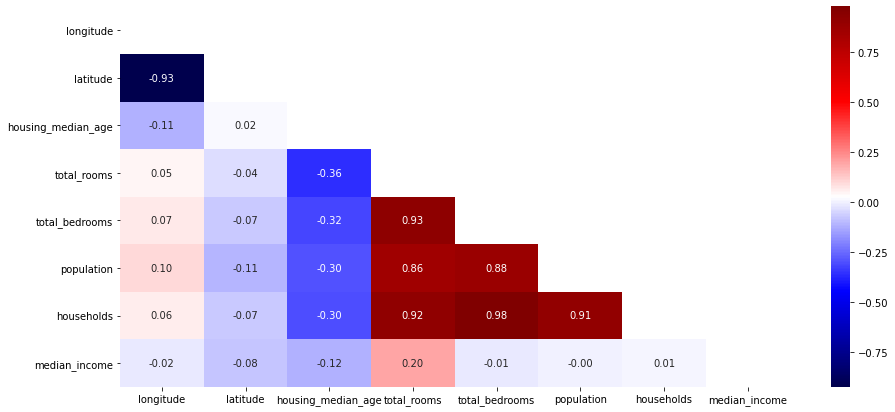

In [98]:
visualCorr(features_scaled)

In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif(x):
    vifFrame = pd.DataFrame()
    vifFrame['vif factor'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1]) ]
    vifFrame['features'] = x.columns
    return vifFrame

In [100]:
vif(features_scaled)

,vif factor,features
0,8.827117,longitude
1,8.948206,latitude
2,1.262931,housing_median_age
3,12.458147,total_rooms
4,36.966844,total_bedrooms
5,6.525253,population
6,37.135973,households
7,1.738079,median_income


In [103]:
vif(features_scaled.drop(columns=['households','total_rooms']))

,vif factor,features
0,8.170191,longitude
1,8.180601,latitude
2,1.256306,housing_median_age
3,4.576166,total_bedrooms
4,4.542728,population
5,1.113528,median_income


`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


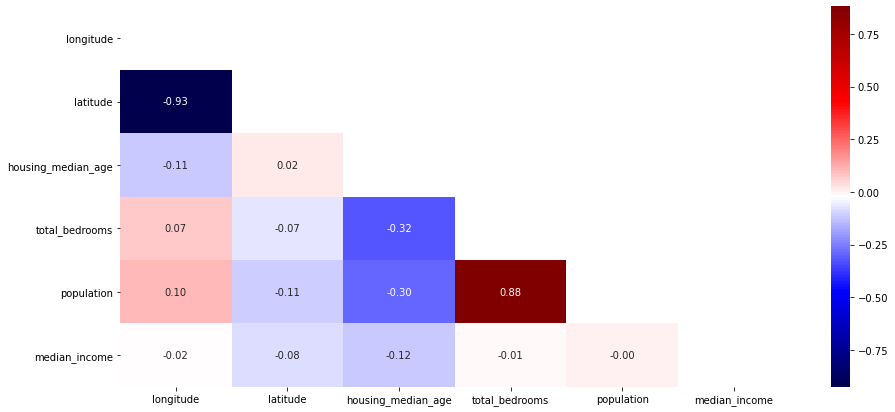

In [104]:
visualCorr(features.drop(columns=['households','total_rooms']))

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


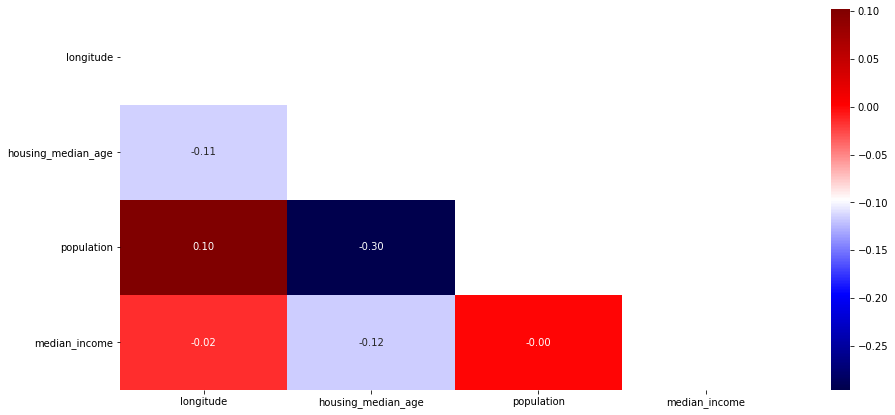

In [118]:
visualCorr(features.drop(columns=['households','total_rooms','total_bedrooms','latitude']))

In [125]:
features_multicol = features.drop(columns=['households','total_rooms','total_bedrooms','latitude'])
features_multicol

,longitude,housing_median_age,population,median_income
0,-114.31,15.0,1015.0,1.4936
1,-114.47,19.0,1129.0,1.8200
2,-114.56,17.0,333.0,1.6509
3,-114.57,14.0,515.0,3.1917
4,-114.57,20.0,624.0,1.9250
...,...,...,...,...
16995,-124.26,52.0,907.0,2.3571
16996,-124.27,36.0,1194.0,2.5179
16997,-124.30,17.0,1244.0,3.0313
16998,-124.30,19.0,1298.0,1.9797


In [137]:
target_df = pd.DataFrame(data = target)

In [148]:
from statsmodels.formula.api import ols
target_df = pd.DataFrame(data = target)
data_all_multicol = pd.concat([features_multicol, target_df], axis=1)
olsModel = ols('target ~ features_multicol', data = data_all_multicol).fit()
print(olsModel.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     4516.
Date:                Mon, 26 Jul 2021   Prob (F-statistic):               0.00
Time:                        00:36:09   Log-Likelihood:            -2.1621e+05
No. Observations:               17000   AIC:                         4.324e+05
Df Residuals:                   16995   BIC:                         4.325e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1.195e+05 

In [151]:
features_multicol.columns

Index(['longitude', 'housing_median_age', 'population', 'median_income'], dtype='object')

In [160]:
from statsmodels.formula.api import ols
target_df = pd.DataFrame(data = target)
olsModel = ols('target ~ features', data = features).fit()
print(olsModel.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     3798.
Date:                Mon, 26 Jul 2021   Prob (F-statistic):               0.00
Time:                        00:48:13   Log-Likelihood:            -2.1365e+05
No. Observations:               17000   AIC:                         4.273e+05
Df Residuals:                   16991   BIC:                         4.274e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.621e+06   6.92e+04    -52.312      

In [161]:
import statsmodels.api as sm

In [169]:
import statsmodels.api as sm

In [176]:
target_df = pd.DataFrame(data = target)
target_df

,median_house_value
0,66900.0
1,80100.0
2,85700.0
3,73400.0
4,65500.0
...,...
16995,111400.0
16996,79000.0
16997,103600.0
16998,85800.0


In [178]:
result = sm.OLS(target_df, features_multicol).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     median_house_value   R-squared (uncentered):                   0.884
Model:                            OLS   Adj. R-squared (uncentered):              0.884
Method:                 Least Squares   F-statistic:                          3.250e+04
Date:                Mon, 26 Jul 2021   Prob (F-statistic):                        0.00
Time:                        01:05:21   Log-Likelihood:                     -2.1621e+05
No. Observations:               17000   AIC:                                  4.324e+05
Df Residuals:                   16996   BIC:                                  4.325e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
longitude            150.1951     20.681      7.262      0.000     109.658     190.732
housing_median_age  1827.2035     52.093     35.076      0.000    1725.095    1929.312
population             3.0980      0.564      5.495      0.000       1.993       4.203
median_income       4.342e+04    327.233    132.688      0.000    4.28e+04    4.41e+04
==============================================================================
Omnibus:                     3479.657   Durbin-Watson:                   0.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8455.976
Skew:                           1.139   Prob(JB):                         0.00
Kurtosis:                       5.597   Cond. No.                         970.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [179]:
model = LinearRegression().fit(features_multicol, target)
yhat = model.predict(features_multicol)
rSquare(features_multicol, target, yhat)

{'r2': 0.5152314290866424, 'adjr2': 0.5151173323356184}

In [181]:
import statsmodels.api as sm
X = sm.add_constant(features_multicol)
model = sm.OLS(target, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     4516.
Date:                Mon, 26 Jul 2021   Prob (F-statistic):               0.00
Time:                        01:18:47   Log-Likelihood:            -2.1621e+05
No. Observations:               17000   AIC:                         4.324e+05
Df Residuals:                   16995   BIC:                         4.325e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.195e+05   3.73e+04     -3.207      0.001   -1.93e+05   -4.64e+04
longitude           -847.7040    311.870     -2.718      0.007   -1459.001    -236.407
housing_median_age  1820.3985     52.122     34.926      0.000    1718.233    1922.564
population             3.2890      0.567      5.803      0.000       2.178       4.400
median_income       4.343e+04    327.172    132.755      0.000    4.28e+04    4.41e+04
==============================================================================
Omnibus:                     3489.994   Durbin-Watson:                   0.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8526.081
Skew:                           1.140   Prob(JB):                         0.00
Kurtosis:                       5.614   Cond. No.                     1.10e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [193]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
target_df = pd.DataFrame(target)
target_scaled = target_df.copy()
target_scaled = scaler.fit_transform(target_df)
target_scaled = pd.DataFrame(target_scaled, columns=['target'])
import statsmodels.api as sm
X = sm.add_constant(features_multicol)
targetscaledModel = sm.OLS(target_scaled, X).fit()
targetscaledModel.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     4516.
Date:                Mon, 26 Jul 2021   Prob (F-statistic):               0.00
Time:                        01:38:13   Log-Likelihood:                -17967.
No. Observations:               17000   AIC:                         3.594e+04
Df Residuals:                   16995   BIC:                         3.598e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.8175      0.321     -8.771      0.000      -3.447      -2.188
longitude             -0.0073      0.003     -2.718      0.007      -0.013      -0.002
housing_median_age     0.0157      0.000     34.926      0.000       0.015       0.017
population          2.836e-05   4.89e-06      5.803      0.000    1.88e-05    3.79e-05
median_income          0.3745      0.003    132.755      0.000       0.369       0.380
==============================================================================
Omnibus:                     3489.994   Durbin-Watson:                   0.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8526.081
Skew:                           1.140   Prob(JB):                         0.00
Kurtosis:                       5.614   Cond. No.                     1.10e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [183]:
target_df = pd.DataFrame(target)

In [184]:
target_df

,median_house_value
0,66900.0
1,80100.0
2,85700.0
3,73400.0
4,65500.0
...,...
16995,111400.0
16996,79000.0
16997,103600.0
16998,85800.0


In [194]:
forward_selection(features_scaled, target)

model                                     LinearRegression()
score                                               0.641169
columns    [median_income, housing_median_age, total_bedr...
Name: 0, dtype: object

In [195]:
backward_elimination(features_scaled, target)

model                                     LinearRegression()
score                                               0.640579
columns    [longitude, latitude, housing_median_age, tota...
Name: 1, dtype: object

In [196]:
stepwise_selection(features_scaled, target)

model                                     LinearRegression()
score                                               0.641169
columns    [median_income, housing_median_age, total_bedr...
Name: 0, dtype: object

In [200]:
model = LinearRegression().fit(features_scaled, target)
eli5.show_weights(model, feature_names = features_scaled.columns.tolist())

Weight?,Feature
+207300.912,<BIAS>
+77291.553,median_income
+49587.338,total_bedrooms
+17470.576,households
+14483.299,housing_median_age
-18263.607,total_rooms
-44178.152,population
-86499.607,longitude
-91744.051,latitude


In [198]:
model = LinearRegression().fit(features_scaled, target)
perm = PermutationImportance(model).fit(features_scaled, target)
eli5.show_weights(perm, feature_names = features_scaled.columns.tolist())

Weight,Feature
1.2449 ± 0.0129,latitude
1.1137 ± 0.0156,longitude
0.8891 ± 0.0115,median_income
0.3624 ± 0.0071,total_bedrooms
0.2864 ± 0.0089,population
0.0494 ± 0.0039,total_rooms
0.0465 ± 0.0020,households
0.0314 ± 0.0015,housing_median_age


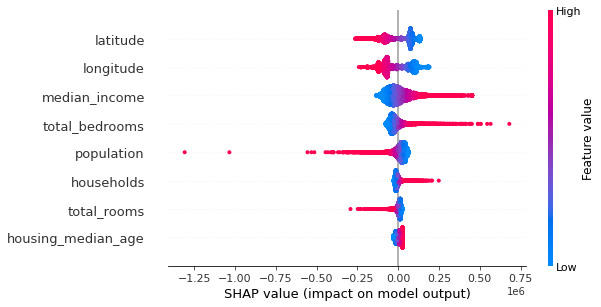

In [201]:
model = LinearRegression().fit(features_scaled, target)
explainer = shap.LinearExplainer(model, features_scaled)
shap_value = explainer.shap_values(features_scaled)
shap.summary_plot(shap_value, features_scaled)

In [202]:
from sklearn.feature_selection import RFE
model = LinearRegression().fit(features_scaled, target)
feature_selector = RFE(model, n_features_to_select=4)
feature_selector = feature_selector.fit(features_scaled, target)

In [206]:
display(feature_selector.n_features_)
display(feature_selector.support_)
features_scaled.loc[:, feature_selector.support_].columns

4

array([ True,  True, False, False,  True, False, False,  True])

Index(['longitude', 'latitude', 'total_bedrooms', 'median_income'], dtype='object')